#Interpretabilidade e Explicabilidade de modelos 👨‍🏫

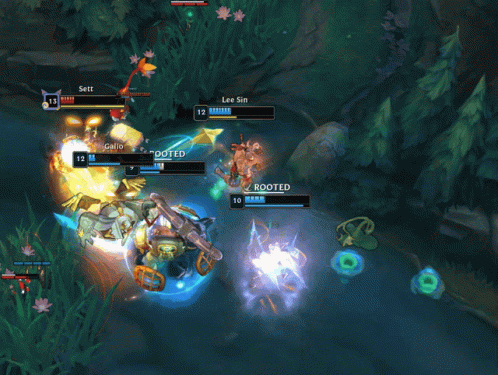

Olá, seja bem-vinde a este notebook que trabalha o dataset sobre os campeões de League of Legends! Caso já tenha se aventurado por Summoner's Rift, talvez tenha, uma vez ou outra, passado por marcantes experiências com um específico grupo de personagens: os lutadores... Independentemente do balanceamento do jogo trabalhar a todo momento, essa classe sempre foi problemática, e é por isso que o trabalho deste notebook se baseia em decidir se um campeão é ou não lutador.
 
O intuito principal apresentado aqui é trabalhar a explicabilidade e interpretabilidade de modelos (o modelo escolhido para ser trabalhado neste notebook foi a Árvore de Decisão). Para isso, será feita uma rápida análise inicialmente, para, posteriormente, ser construída a Árvore de Decisão, serem analisadas suas métricas e, por fim, trabalharemos na interpretabilidade do modelo.

No que diz respeito ao dataset, ele pode ser encontrado [aqui](https://www.kaggle.com/xmorra/lol2020esports) para download.

Caso deseje entender um pouco mais sobre esses assuntos, ou sobre outros ramos de IA, recomendo que busque informações no Turing Talks, blog de informações relacionadas à IA do Turing USP: [Turing Talks](https://medium.com/turing-talks).

Para começar nosso notebook, fiz sua divisão nas etapas a seguir:



**SUMÁRIO**:

1. Importações;
2. Observações iniciais;
3. Trabalhando com variáveis categóricas;
4. Análise rápida dos dados;
5. Construindo o modelo;
6. Métricas;
7. Visualização do modelo;
8. Interpretabilidade e explicabilidade;
9. Fazendo outro modelo.

As informações do dataset podem ser vistas a seguir:


**INFORMAÇÕES DO DATASET:**



* **id**: champion id;
* **key**: champion key;
* **attack**: champion attack rating;
* **defense**: champion defense rating;
* **magic**: champion magic rating;
* **difficulty**: champion difficulty rating;
* **tags**: champion tags;
* **hp**: champion health stat at the start of the game;
* **hpperlevel**: champion health growth per level;
* **mp**: champion mana at the start of the game;
* **mpperlevel**: champion mana growth per level;
* **movespeed**: champion base movement speed;
* **armor**: champion base armor;
* **armorperlevel**: champion armor growth per level;
* **spellblock**: champion base spellblock;
* **spellblockperlevel**: champion spellblock growth per level;
* **attackrange**: champion attack range;
* **hpregen**: champion base health regeneration;
* **hpregenperlevel**: champion health regeneration growth per level;
* **mpregen**: champion base mana regeneration;
* **mpregenperlevel**: champion mana regeneration growth per level;
* **crit**: champion base critical damage;
* **critperlevel**: champion critical damage growth per level;
* **attackdamage**: champion base attack damage;
* **attackdamageperlevel**: champion attack damage growth per level;
* **attackspeedperlevel**: champion attack speed growth per level;
* **attackspeed**: champion base attack speed.



# 1. Importações 📚

In [ ]:
#operações básicas
import numpy as np
import pandas as pd

#para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import plot_tree

#para o modelo de predição
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier

#para as métricas
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix

#para a explicabilidade
!pip install shap
import shap
!pip install lime
import lime
import lime.lime_tabular

In [2]:
df = pd.read_csv("champion_stats.csv")

# 2. Observações Iniciais 🧐

In [3]:
df.head()

Unnamed: 0       id  ...  attackspeedperlevel  attackspeed
0           0   Aatrox  ...                2.500        0.651
1           1     Ahri  ...                2.000        0.668
2           2    Akali  ...                3.200        0.625
3           3  Alistar  ...                2.125        0.625
4           4    Amumu  ...                2.180        0.736

[5 rows x 28 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            150 non-null    int64  
 1   id                    150 non-null    object 
 2   key                   150 non-null    int64  
 3   attack                150 non-null    int64  
 4   defense               150 non-null    int64  
 5   magic                 150 non-null    int64  
 6   difficulty            150 non-null    int64  
 7   tags                  150 non-null    object 
 8   hp                    150 non-null    float64
 9   hpperlevel            150 non-null    int64  
 10  mp                    150 non-null    float64
 11  mpperlevel            150 non-null    float64
 12  movespeed             150 non-null    int64  
 13  armor                 150 non-null    float64
 14  armorperlevel         150 non-null    float64
 15  spellblock            1

In [5]:
df.describe()

Unnamed: 0         key  ...  attackspeedperlevel  attackspeed
count  150.000000  150.000000  ...           150.000000   150.000000
mean    74.500000  138.366667  ...             2.467380     0.646940
std     43.445368  163.644459  ...             0.828355     0.034761
min      0.000000    1.000000  ...             0.000000     0.475000
25%     37.250000   38.250000  ...             2.000000     0.625000
50%     74.500000   84.500000  ...             2.500000     0.639000
75%    111.750000  148.750000  ...             3.000000     0.658000
max    149.000000  876.000000  ...             6.000000     0.800000

[8 rows x 26 columns]

Podemos dropar algumas colunas que não nos acrescentam algo relevante. A coluna "id" será dropada posteriormente, pois ainda será utilizada nas análises.

In [6]:
df.drop(columns=['Unnamed: 0','key'], inplace = True)

# 3. Trabalhando com variáveis categóricas 🔡

Primeiro, transformaremos os valores da coluna "tags" em listas para, posteriormente, a conversão para valores binários. Faremos isso em um dataset auxiliar, já que as tags originais serão utilizadas nas análises.

In [7]:
df_tagslist = df.copy(deep = True)
for i in df.index:
  df_tagslist['tags'][i] = eval(df['tags'][i])


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
numeric = pd.get_dummies(df_tagslist['tags'].apply(pd.Series).stack()).sum(level=0)

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().


In [9]:
df_numeric = df_tagslist.join(numeric, how='outer')

In [10]:
df_numeric.head()

id  attack  defense  magic  ...  Mage Marksman  Support  Tank
0   Aatrox       8        4      3  ...     0        0        0     1
1     Ahri       3        4      8  ...     1        0        0     0
2    Akali       5        3      8  ...     0        0        0     0
3  Alistar       6        9      5  ...     0        0        1     1
4    Amumu       2        6      8  ...     1        0        0     1

[5 rows x 32 columns]

Neste dataset, podemos, então, retirar a coluna "tags", já que ainda a temos no dataset original.

In [11]:
df_numeric.drop(columns=['tags'], inplace = True)

# 4. Análise rápida dos Dados 🎲

In [12]:
#Definindo a nossa palheta de cores:
sns.set_palette('gist_rainbow')

#Definindo o nosso estilo para o fundo dos gráficos:
sns.set_style('darkgrid')

In [13]:
roles = ["Assassin", "Fighter", "Mage", "Marksman", "Support", "Tank"]

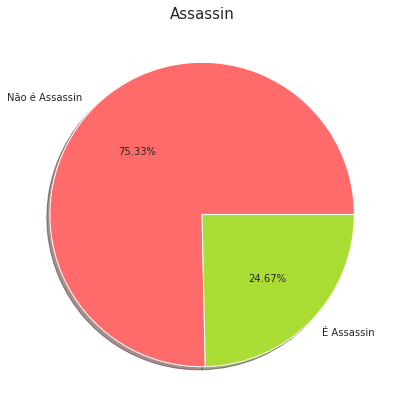

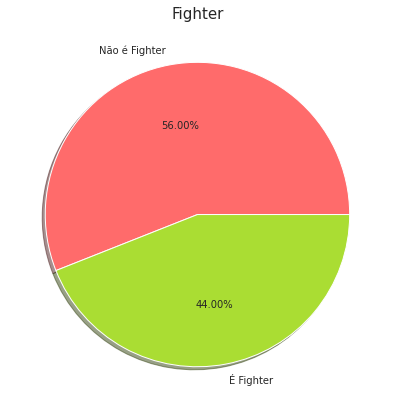

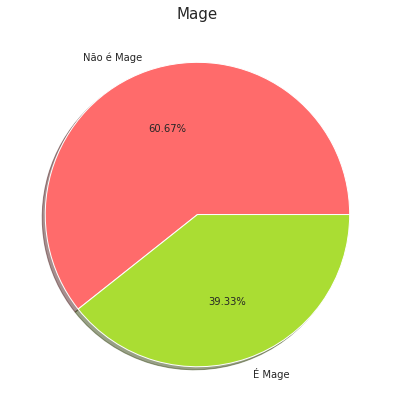

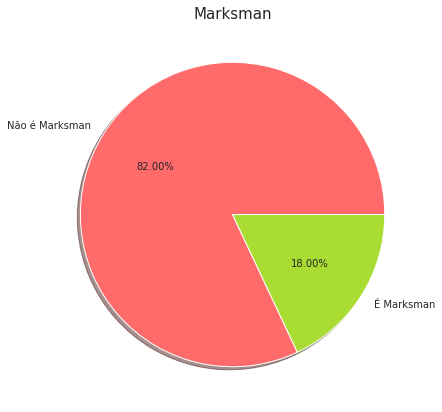

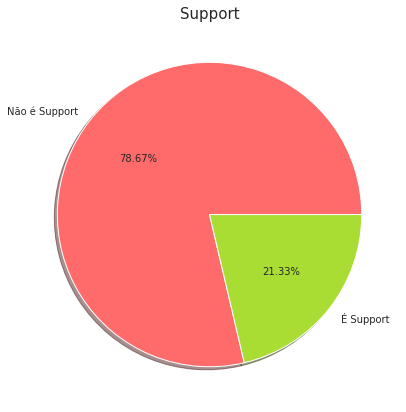

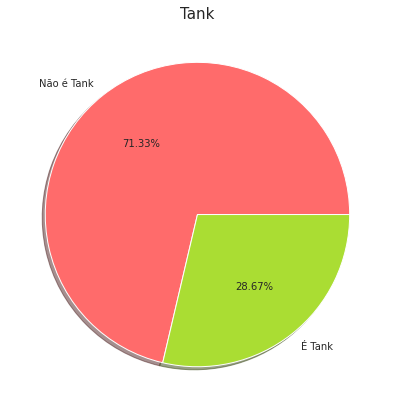

In [14]:
for role in roles:
  labels = [f'Não é {role}', f'É {role}']
  sizes = df_numeric[role].value_counts().values
  colors = ['#ff6b6b', '#aadd33']
  plt.figure(figsize = (7,7))
  plt.pie(sizes, labels = labels, shadow = True, autopct = '%1.2f%%', colors = colors)
  plt.title(role, fontsize = 15)
  plt.show()

Percebemos, então, que a classe dos lutadores (Fighter) possui dados relativamente distribuídos.

In [15]:
fig = px.scatter(x = "armor", y = "spellblock", size = "hp", color = "tags",
                 hover_name = "id", log_x = True, size_max = 60, data_frame = df,
                 title = "Distribution of champions by defensive attributes",
                 width = 1300, height = 600)
fig.show()

In [16]:
fig = px.scatter(x = "attackdamage", y = "attackspeed", size = "attackrange", color = "tags",
                 hover_name = "id", log_x = True, size_max = 60, data_frame = df,
                 title = "Distribution of champions by ofensive attributes",
                 width = 1300, height = 600)
fig.show()

In [17]:
df_numeric.drop(columns=['id'], inplace = True)

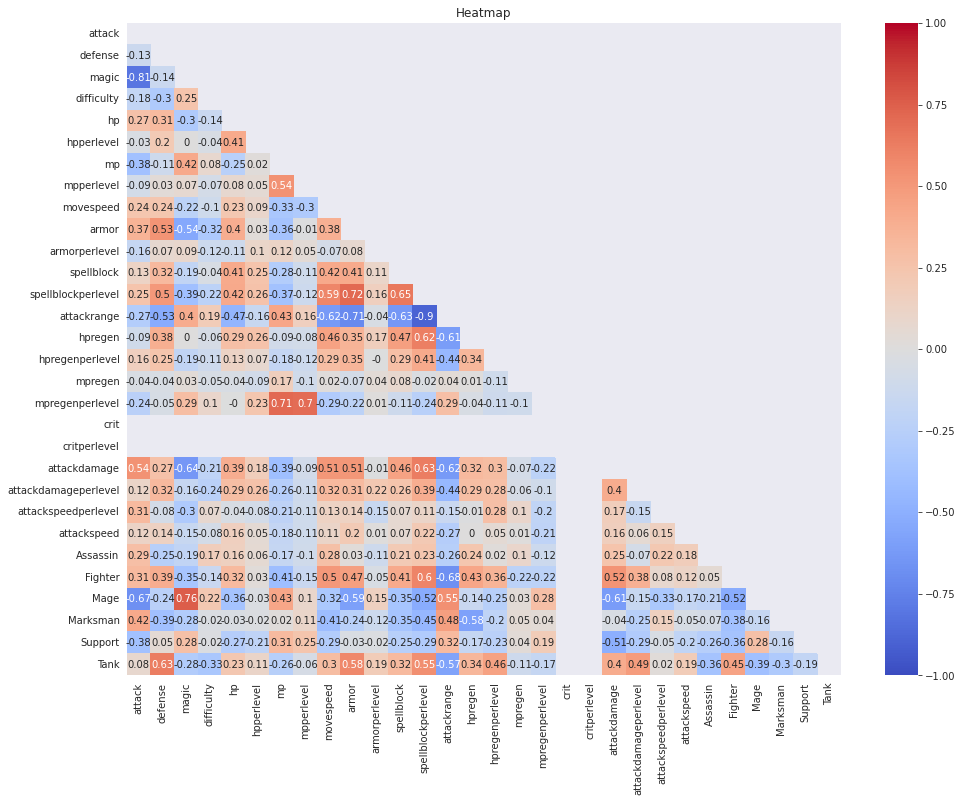

In [18]:
plt.figure(figsize=(16,12))

#O parâmetro mask faz com que o gráfico não fique espelhado, para facilitar a visualização:
corr = df_numeric.corr()
mask = mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmax=1, vmin=-1, annot=np.round(corr.values, 2), cmap='coolwarm', mask=mask) 
plt.title("Heatmap")
plt.show()

Percebemos que lutadores estão mais relacionados de forma diretamente proporcional à 'movespeed', 'armor', 'spellblockperlevel' e 'attackdamage', enquanto, de forma indiretamente proporcional, à 'attackrange', 'mp' e 'magic'.

# 5. Construindo o modelo 👷

## 5.1 Separando o dataset

In [19]:
X = df_numeric.drop('Fighter', axis = 1)
y = df_numeric['Fighter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 5.2 Montando a Árvore de Decisão

In [20]:
def max_depth_choice():
  max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  for item in max_depth:
    clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = item, min_samples_leaf = 5)
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    print(f'Acurácia {accuracy} - Max Depth {item}')

In [21]:
max_depth_choice()

Acurácia 0.8157894736842105 - Max Depth 2
Acurácia 0.7105263157894737 - Max Depth 3
Acurácia 0.7105263157894737 - Max Depth 4
Acurácia 0.7105263157894737 - Max Depth 5
Acurácia 0.7105263157894737 - Max Depth 6
Acurácia 0.7105263157894737 - Max Depth 7
Acurácia 0.7105263157894737 - Max Depth 8
Acurácia 0.7105263157894737 - Max Depth 9
Acurácia 0.7105263157894737 - Max Depth 10


Como vários valores de profundidade máxima apresentam acurácia igual, escolheremos o valor 4, que não é tão alto, nem tão baixo, tendo noção do tamanho pequeno do dataset em questão.

In [22]:
def min_samples_leaf(depth):
  min_samples_leaf = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  for item in min_samples_leaf:
    clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = depth, min_samples_leaf =item)
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    print(f'Acurácia {accuracy} - Min Samples Leaf {item}'.format(accuracy, item))

In [23]:
min_samples_leaf(4)

Acurácia 0.7368421052631579 - Min Samples Leaf 2
Acurácia 0.7368421052631579 - Min Samples Leaf 3
Acurácia 0.7894736842105263 - Min Samples Leaf 4
Acurácia 0.7105263157894737 - Min Samples Leaf 5
Acurácia 0.7894736842105263 - Min Samples Leaf 6
Acurácia 0.7105263157894737 - Min Samples Leaf 7
Acurácia 0.6842105263157895 - Min Samples Leaf 8
Acurácia 0.6842105263157895 - Min Samples Leaf 9
Acurácia 0.6842105263157895 - Min Samples Leaf 10


Será escolhida, então, a quantidade de 4 para quantidade de samples mínimas para cada folha.

In [24]:
model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 4, min_samples_leaf = 4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Métricas 📏

In [25]:
def resultados(y_test, y_pred):
    '''
    Evidencia métricas do modelo e mostra 
    '''
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Acurácia: {acc} \n F1: {f1} \n Precisão: {precision} \n Recall: {recall}')

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    RocCurveDisplay.from_estimator(model, X_test, y_test) 

Acurácia: 0.7894736842105263 
 F1: 0.6923076923076923 
 Precisão: 0.6923076923076923 
 Recall: 0.6923076923076923


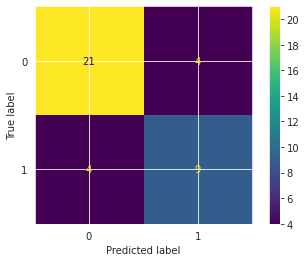

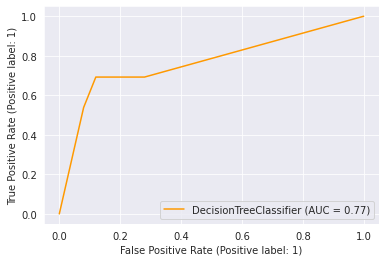

In [26]:
resultados(y_test,y_pred)

# 7. Visualização do modelo 👀

Podemos, primeiramente, ver a árvore de acordo com o sklearn:

In [27]:
feature_names = df_numeric.columns

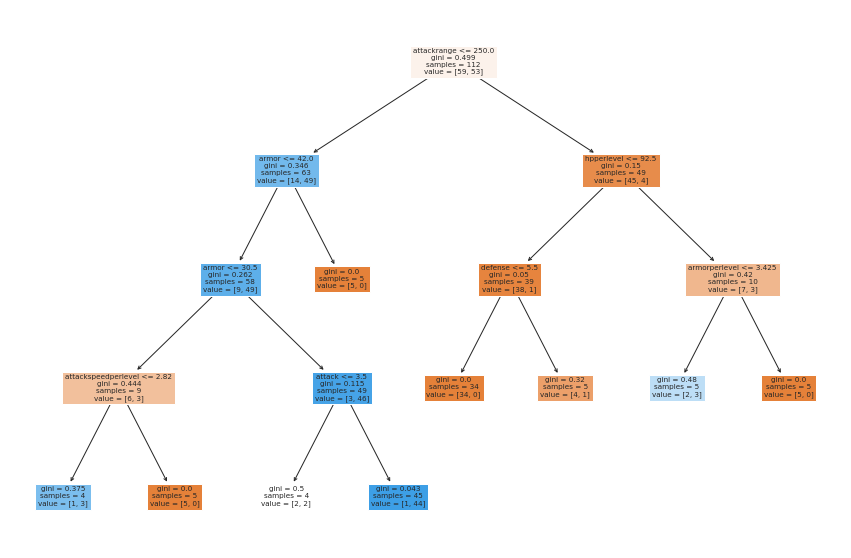

In [28]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names = feature_names, filled=True)
plt.show()

Podemos, também, vê-la com o Plotly:

In [29]:
labels = [''] * model.tree_.node_count
parents = [''] * model.tree_.node_count
labels[0] = 'root'
for i, (f, t, l, r) in enumerate(zip(
    model.tree_.feature,
    model.tree_.threshold,
    model.tree_.children_left,
    model.tree_.children_right,
)):
    if l != r:
        labels[l] = f'{feature_names[f]} <= {t:g}'
        labels[r] = f'{feature_names[f]} > {t:g}'
        parents[l] = parents[r] = labels[i]

fig = go.Figure(go.Treemap(
    branchvalues='total',
    labels=labels,
    parents=parents,
    values=model.tree_.n_node_samples,
    textinfo='label+value+percent root',
    marker=dict(colors=model.tree_.impurity),
    customdata=list(map(str, model.tree_.value)),
    hovertemplate='''
<b>%{label}</b><br>
impurity: %{color}<br>
samples: %{value} (%{percentRoot:%.2f})<br>
value: %{customdata}'''
))
fig.show()

# 8. Explicabilidade e Interpretabilidade 📊

Utilizando o LIME, podemos ver um exemplo que nosso modelo classificou e ver as influências de cada feature:

Intercept 0.314382977345248
Prediction_local [0.70286506]
Right: 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



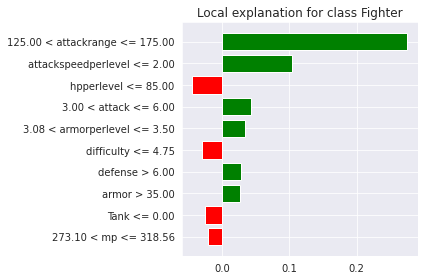

In [30]:
#Explain samples in test set
X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=True,
                                                   class_names=["Not Figher", "Fighter"],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=123)

exp = explainer.explain_instance(X_explain.values[2,:],model.predict_proba)

#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

Agora, com o SHAP, podemos ver a influências das features para o modelo:

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

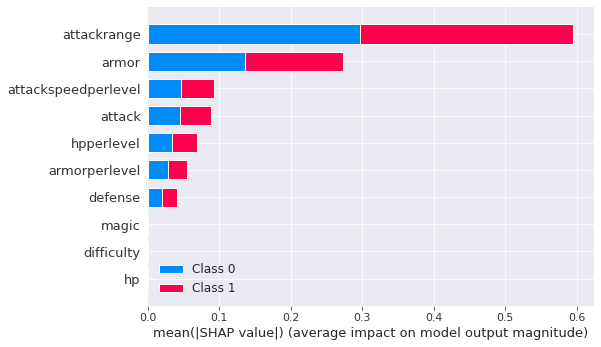

In [32]:
shap.summary_plot(shap_values, X, plot_type = 'bar', max_display = 10)

Assim como fizemos com o LIME, podemos, com o SHAP, ver a influência de cada feature para um exemplo específico:

In [33]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_explain.iloc[0,:])

Podemos, também, ver a influência de cada feature para a decisão do modelo de acordo com o gráfico a seguir:

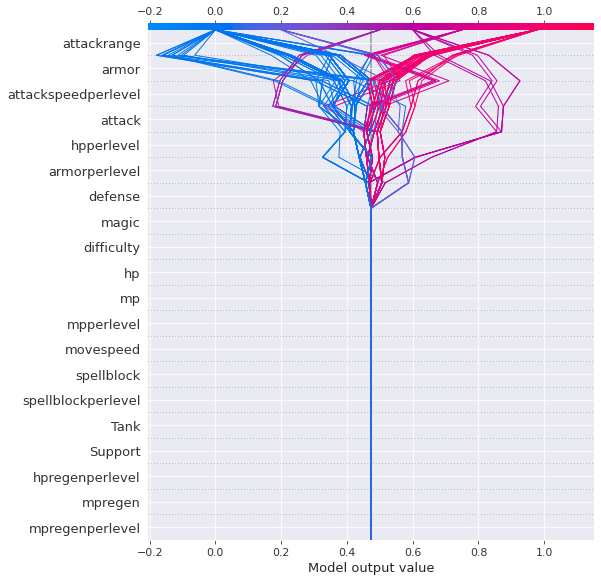

In [34]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)

# 9. Fazendo outro modelo 👨🏻‍💻

Podemos, por fim, tentar remover as features que não auxiliam tanto nosso modelo, para ver se as métricas aumentam.

In [35]:
df2 = df_numeric.copy(deep = True)

In [36]:
df2.drop(columns=['magic', 'difficulty', 'hp','mp', 'mpperlevel', 'movespeed', 'spellblock',
       'spellblockperlevel', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel','attackspeed',
       'Assassin', 'Mage', 'Marksman', 'Support', 'Tank'], inplace = True)

In [37]:
df2.head()

attack  defense  hpperlevel  ...  attackrange  attackspeedperlevel  Fighter
0       8        4          90  ...          175                2.500        1
1       3        4          92  ...          550                2.000        0
2       5        3          95  ...          125                3.200        0
3       6        9         106  ...          125                2.125        0
4       2        6          84  ...          125                2.180        0

[5 rows x 8 columns]

In [38]:
X = df2.drop('Fighter', axis = 1)
y = df2['Fighter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
max_depth_choice()

Acurácia 0.8157894736842105 - Max Depth 2
Acurácia 0.7105263157894737 - Max Depth 3
Acurácia 0.7105263157894737 - Max Depth 4
Acurácia 0.7105263157894737 - Max Depth 5
Acurácia 0.7105263157894737 - Max Depth 6
Acurácia 0.7105263157894737 - Max Depth 7
Acurácia 0.7105263157894737 - Max Depth 8
Acurácia 0.7105263157894737 - Max Depth 9
Acurácia 0.7105263157894737 - Max Depth 10


In [40]:
min_samples_leaf(3)

Acurácia 0.7105263157894737 - Min Samples Leaf 2
Acurácia 0.7105263157894737 - Min Samples Leaf 3
Acurácia 0.7105263157894737 - Min Samples Leaf 4
Acurácia 0.7105263157894737 - Min Samples Leaf 5
Acurácia 0.7105263157894737 - Min Samples Leaf 6
Acurácia 0.8947368421052632 - Min Samples Leaf 7
Acurácia 0.8947368421052632 - Min Samples Leaf 8
Acurácia 0.8947368421052632 - Min Samples Leaf 9
Acurácia 0.7894736842105263 - Min Samples Leaf 10


In [41]:
model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 3, min_samples_leaf = 7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Acurácia: 0.8947368421052632 
 F1: 0.8461538461538461 
 Precisão: 0.8461538461538461 
 Recall: 0.8461538461538461


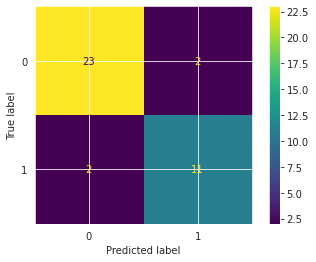

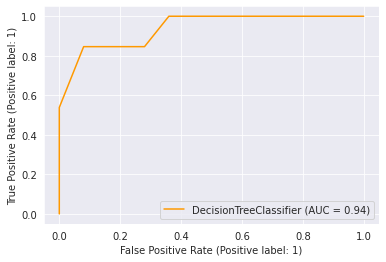

In [42]:
resultados(y_test,y_pred)

In [43]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

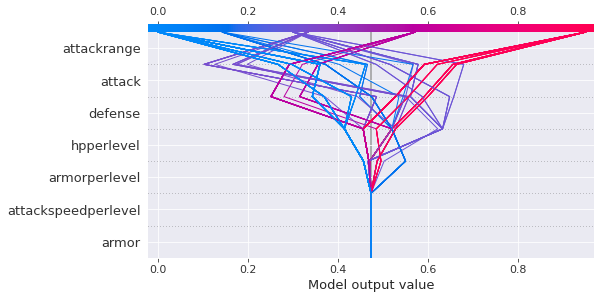

In [44]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)